**JPEG Compression**
<ul><li>Discrete Cosine Transform
<li>Coefficient Quantization
<li>Inverse Discrete Cosine Transform

-Abinaya U(19PD02)

In [1]:
# Importing all necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from math import sqrt, cos
from math import log10, sqrt
import cv2
import numpy as np

In [2]:
# Opening the bmp file and reading the image and storing it in im.
image = Image.open("bmp_image.bmp")

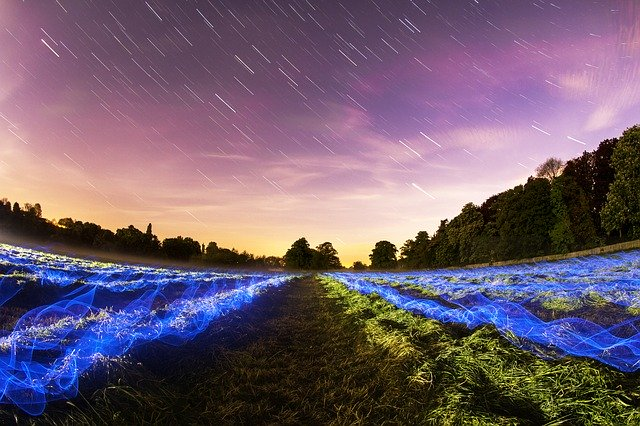

In [3]:
# Display the bmp image
image

In [4]:
print("Image Format: ",image.format)

Image Format:  BMP


In [5]:
print("Image Size: ",image.size)

Image Size:  (640, 426)


In [6]:
print("Image mode: ",image.mode)

Image mode:  RGB


In [7]:
data = np.array(image)
data

array([[[178, 130, 144],
        [173, 125, 139],
        [170, 122, 138],
        ...,
        [125,  93, 117],
        [124,  88, 114],
        [122,  86, 112]],

       [[178, 130, 144],
        [175, 127, 141],
        [173, 125, 141],
        ...,
        [127,  93, 118],
        [125,  89, 115],
        [123,  87, 113]],

       [[178, 130, 144],
        [177, 129, 143],
        [176, 128, 144],
        ...,
        [126,  92, 117],
        [125,  89, 115],
        [127,  88, 115]],

       ...,

       [[  0,   1,   0],
        [ 17,  19,  16],
        [  3,   2,   0],
        ...,
        [ 14,  24,   0],
        [ 67,  78,  10],
        [ 93, 104,  36]],

       [[  4,   6,   1],
        [  7,   9,   4],
        [  9,   8,   6],
        ...,
        [ 55,  64,   0],
        [ 26,  37,   0],
        [ 92, 103,  35]],

       [[  4,   6,   1],
        [  7,   9,   4],
        [  9,   8,   6],
        ...,
        [ 91, 100,  33],
        [ 44,  53,   0],
        [115, 126,  58]]

**Converted the RGB color image to YCbCr image**

In [8]:
img_yuv = image.convert('YCbCr')
y, cb, cr = img_yuv.split()

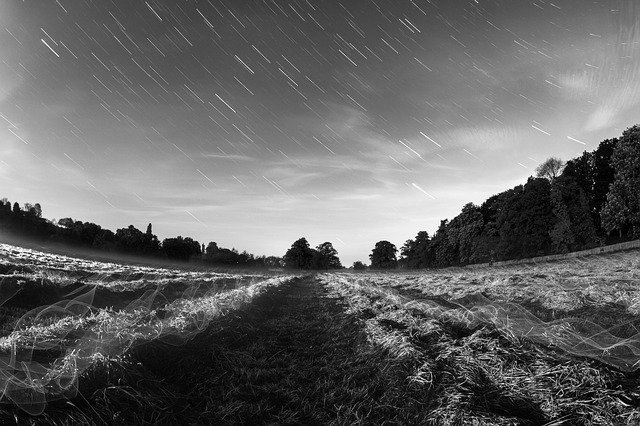

In [9]:
y

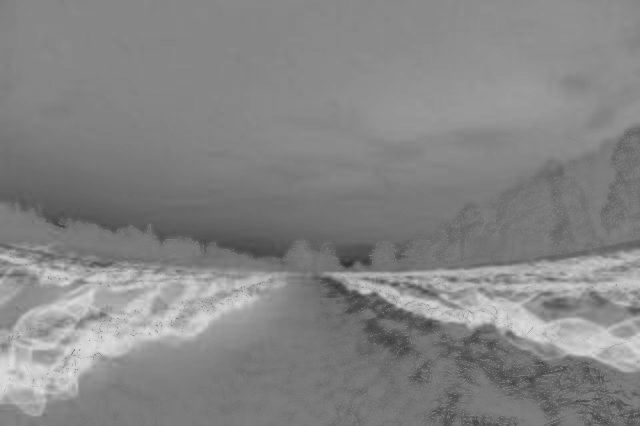

In [10]:
cb

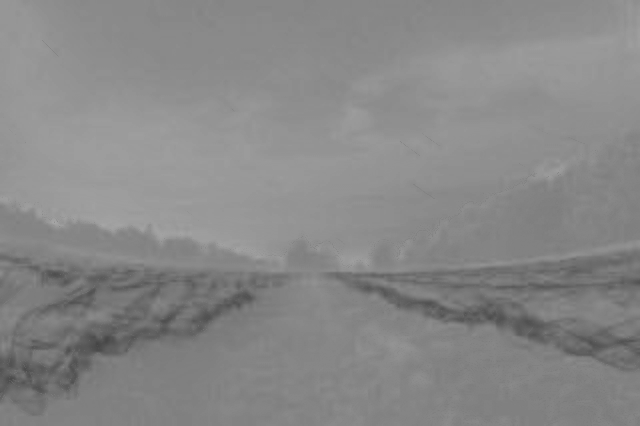

In [11]:
cr

In [12]:
img_yuv.size

(640, 426)

In [13]:
img_array =  np.array(y)
img_array

array([[145, 140, 138, ..., 105, 101,  99],
       [145, 142, 141, ..., 106, 102, 100],
       [145, 144, 144, ..., 105, 102, 102],
       ...,
       [  0,  18,   2, ...,  18,  66,  92],
       [  4,   7,   8, ...,  54,  29,  91],
       [  4,   7,   8, ...,  89,  44, 114]], dtype=uint8)

In [14]:
# Calculating the height and width of the image for spliting purpose.
height  = len(img_array) 
width = len(img_array[0]) 
sliced = []
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width))

The image heigh is 426, and image width is 640


**Dividing the image into 8 x 8 blocks for applying DCT.**

In [15]:
currY = 0 #current Y index
for i in range(block,height+1,block):
    currX = 0 #current X index
    for j in range(block,width+1,block):
        sliced.append(img_array[currY:i,currX:j] - np.ones((8,8))*128) #Extracting 128 from all pixels
        currX = j
    currY = i

In [16]:
sliced

[array([[17., 12., 10., 10., 11.,  7.,  1., -2.],
        [17., 14., 13., 12., 10.,  6.,  2.,  2.],
        [17., 16., 16., 14., 10.,  5.,  4.,  6.],
        [19., 16., 15., 13., 10.,  7.,  5.,  7.],
        [22., 16., 12., 12., 12.,  9.,  6.,  5.],
        [21., 15., 11., 11., 13., 10.,  6.,  4.],
        [19., 15., 13., 14., 12.,  9.,  6.,  5.],
        [17., 16., 16., 16., 12.,  7.,  6.,  7.]]),
 array([[  0.,   0.,  -1.,  -4.,  -7.,  -9., -12., -12.],
        [  0.,  -1.,  -2.,  -4.,  -6.,  -8., -10., -11.],
        [  0.,  -1.,  -2.,  -3.,  -6.,  -7.,  -8.,  -9.],
        [  2.,   1.,  -1.,  -2.,  -5.,  -6.,  -8.,  -9.],
        [  5.,   3.,   0.,  -1.,  -3.,  -5.,  -8., -10.],
        [  7.,   4.,   1.,  -1.,  -2.,  -4.,  -7., -10.],
        [  7.,   4.,   0.,  -1.,  -1.,  -2.,  -5.,  -8.],
        [  6.,   3.,  -1.,  -1.,   0.,  -1.,  -4.,  -6.]]),
 array([[-13., -12., -20., -25., -16., -23., -14.,  44.],
        [-18., -11., -10., -15., -10., -20., -28.,   1.],
        [-15., -

In [17]:
print("Size of the sliced image: "+str(len(sliced)))
print("Each element of sliced list contains a "+ str(sliced[0].shape)+ " element.")

Size of the sliced image: 4240
Each element of sliced list contains a (8, 8) element.


In [18]:
sliced_float = [np.float32(img) for img in sliced] # for Discrete Cosine Transfrom calculation
#sliced_float

**Applying Discrete Cosine Transform to the sliced matrix**

In [19]:
def dctTransform(matrix):
  pi = 3.142857
  dct_ = []
  for i in range(0,8):
    dct_row=[]
    for j in range(0,8):
          if (i == 0):
              ci = 1 / sqrt(8)
          else:
              ci = sqrt(2) / sqrt(8)
          if (j == 0):
              cj = 1 / sqrt(8)
          else:
              cj = sqrt(2) / sqrt(8)
          sum_ = 0
          for k in range(0,8):
              for l in range(0,8):
                  dct_1 = matrix[k][l] *cos((2 * k + 1) * i * pi / (2 * 8)) *cos((2 * l + 1) * j * pi / (2 * 8))
                  sum_ = sum_ + dct_1
          dct_row.append(ci * cj * sum_)
    dct_.append(dct_row)
  return np.array(dct_)
 

In [20]:
DCT_output = []
for matrix in sliced_float:
    curr_DCT = dctTransform(matrix)
    DCT_output.append(curr_DCT)

In [21]:
DCT_output

[array([[ 8.71250000e+01,  3.71740710e+01, -2.13533778e+00,
          4.84624260e+00,  6.63458225e+00,  5.35381017e-02,
          1.05209563e+00,  3.65532712e-01],
        [-8.28955256e+00,  2.79354777e+00, -1.44112582e+00,
          2.24525972e-01, -5.02794424e-01, -6.04918083e-01,
          8.99492056e-01,  4.22376974e-01],
        [-4.37607443e+00,  2.26425496e-01, -4.41238056e+00,
         -1.41893507e-01, -1.66298458e-01,  2.47228575e-01,
         -2.75074899e-01, -4.59235698e-02],
        [-3.30798344e+00,  1.23122251e-01,  1.23446877e-01,
          9.55807718e+00,  2.32457144e-01, -2.92989008e-01,
          3.74184059e-02,  3.41265355e-01],
        [ 1.88466163e-01,  1.93710185e-01,  1.57743733e-01,
          1.30849908e-01,  1.28761450e-01,  1.00241902e-01,
          6.74805095e-02,  3.29338260e-02],
        [-5.61533355e-01, -5.25633303e-01, -2.65442649e-01,
         -2.97028467e-01, -2.57867241e-01,  2.30964915e-01,
          3.10524435e-01, -1.80565126e-01],
        [ 1.5098

In [22]:
print("Size of the image after applying DCT: "+str(len(DCT_output)))

Size of the image after applying DCT: 4240


In [23]:
row = 0
rowNcol = []
for j in range(int(width/block),len(DCT_output)+1,int(width/block)):
    rowNcol.append(np.hstack((DCT_output[row:j])))
    row = j
res_dct = np.vstack((rowNcol))

**Image after applying Discrete Cosine Transform**

Image after applying DCT



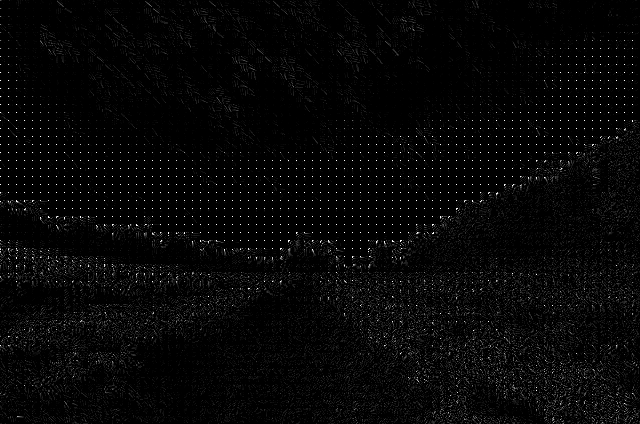

In [24]:
dct_img = Image.fromarray(res_dct)
print("Image after applying DCT\n")
if dct_img.mode != 'RGB': # If the image is not RGB, then the image is converted into RGB and displayed
    dct_img = dct_img.convert('RGB')
dct_img

**Applying Coefficient Quantization on the above Discrete Cosine Transform matrix**

In [25]:
Q_c = np.array([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]],dtype=np.float32)

In [26]:
Quantized_output = np.copy(DCT_output)
for dct in Quantized_output:
    for i in range(block):
        for j in range(block):
            dct[i,j] = np.around(dct[i,j]/Q_c[i,j])

In [27]:
Quantized_output

array([[[  5.,   3.,  -0., ...,   0.,   0.,   0.],
        [ -1.,   0.,  -0., ...,  -0.,   0.,   0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,  -0.],
        ...,
        [ -0.,  -0.,  -0., ...,   0.,   0.,  -0.],
        [  0.,  -0.,  -0., ...,  -0.,  -0.,   0.],
        [  0.,   0.,  -0., ...,   0.,  -0.,  -0.]],

       [[ -1.,   3.,  -0., ...,   0.,   0.,  -0.],
        [ -1.,   0.,  -0., ...,   0.,   0.,  -0.],
        [ -0.,  -0.,   0., ...,  -0.,   0.,   0.],
        ...,
        [  0.,  -0.,   0., ...,   0.,   0.,  -0.],
        [ -0.,  -0.,   0., ...,   0.,   0.,   0.],
        [  0.,  -0.,  -0., ...,   0.,  -0.,  -0.]],

       [[ -7.,   1.,   1., ...,  -0.,   0.,  -0.],
        [ -0.,  -2.,   1., ...,  -0.,   0.,  -0.],
        [  1.,  -1.,   1., ...,  -0.,   0.,   0.],
        ...,
        [  0.,  -0.,   0., ...,   0.,   0.,   0.],
        [ -0.,   0.,  -0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  -0.,   0.,   0.]],

       ...,

       [[-37.,  -0.,   8

In [28]:
print("Size of the Quantized matrix: "+str(len(Quantized_output)))

Size of the Quantized matrix: 4240


In [29]:
row = 0
rowNcol = []
for j in range(int(width/block),len(Quantized_output)+1,int(width/block)):
    rowNcol.append(np.hstack((Quantized_output[row:j])))
    row = j
res_q = np.vstack((rowNcol))

**Image after applying coefficient quantisation**

Image after applying coefficient quantisation



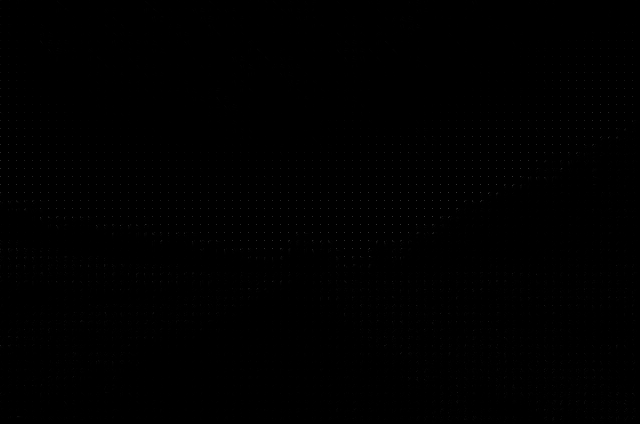

In [30]:
q_img = Image.fromarray(res_q)
print("Image after applying coefficient quantisation\n")
if q_img.mode != 'RGB': # If the image is not RGB, then the image is converted into RGB and displayed
    q_img = q_img.convert('RGB')
q_img

**Comparison between the DCT of first 8 x 8 block and Quantized matrix of first 8 x 8 block**

Text(0.5, 1.0, 'Quantised matrix of first 8*8 block')

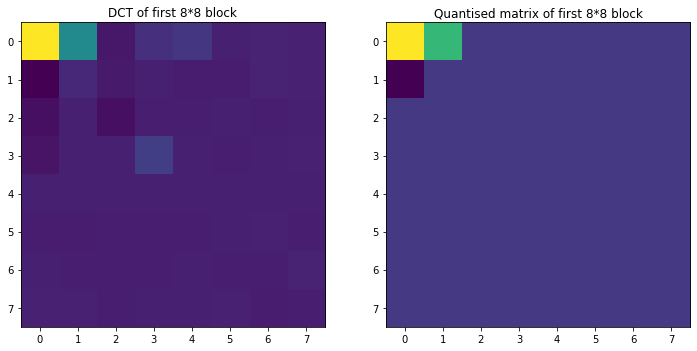

In [31]:
fig, ax = plt.subplots(ncols = 2, figsize = (12, 12))
ax[0].imshow(DCT_output[0])
ax[0].set_title("DCT of first 8*8 block")
ax[1].imshow(Quantized_output[0])
ax[1].set_title("Quantised matrix of first 8*8 block")

**Applying Inverse Discrete Cosine Transform**

In [32]:
def idctTransform(matrix):
  pi = 3.142857
  idct = []
  for i in range(0,8):
    idct_row = []
    for j in range(0,8):
          if (i == 0):
              ci = 1 / sqrt(8)
          else:
              ci = 1
          if (j == 0):
              cj = 1 / sqrt(8)
          else:
              cj = 1
          sum_ = 0
          for k in range(0,8):
              for l in range(0,8):
                  idct_1 = matrix[k][l]*cos((2*(i)+1)*k*pi/(2*8))*cos((2*(j)+1)*l*pi/(2*8))
                  sum_ = sum_ + idct_1
          idct_row.append(ci * cj * sum_)
    idct.append(idct_row)
  return np.array(idct)

In [33]:
IDCT_output = []
for matrix in Quantized_output:
    curr_iDCT = idctTransform(matrix)
    IDCT_output.append(curr_iDCT)

In [34]:
IDCT_output

[array([[0.87019247, 2.30277942, 2.00993517, 1.62736151, 1.21334812,
         0.83097486, 0.53850086, 0.38048802],
        [2.51410816, 6.66267577, 5.83438712, 4.75230543, 3.58129871,
         2.49978381, 1.67254242, 1.22561461],
        [2.61172291, 6.93877198, 6.11048334, 5.02840164, 3.85739492,
         2.77588003, 1.94863863, 1.50171082],
        [2.73924746, 7.29946588, 6.47117724, 5.38909554, 4.21808882,
         3.13657393, 2.30933253, 1.86240472],
        [2.87725192, 7.68980145, 6.86151281, 5.77943111, 4.6084244 ,
         3.5269095 , 2.6996681 , 2.25274029],
        [3.00470968, 8.05030642, 7.22201778, 6.13993608, 4.96892936,
         3.88741446, 3.06017307, 2.61324526],
        [3.10220101, 8.32605355, 7.49776491, 6.41568321, 5.24467649,
         4.1631616 , 3.3359202 , 2.88899239],
        [3.15487196, 8.47502948, 7.64674084, 6.56465914, 5.39365243,
         4.31213753, 3.48489614, 3.03796833]]),
 array([[ 0.12019247,  0.18145908, -0.11138518, -0.49395883, -0.90797222,
    

In [35]:
print("Size of the Inverse DCT matrix: "+str(len(IDCT_output)))

Size of the Inverse DCT matrix: 4240


In [36]:
row = 0
rowNcol = []
for j in range(int(width/block),len(IDCT_output)+1,int(width/block)):
    rowNcol.append(np.hstack((IDCT_output[row:j])))
    row = j
res_IDCT = np.vstack((rowNcol))

**Image after applying Inverse Discrete Cosine Transform**

Image after applying Inverse Discrete Cosine Transform



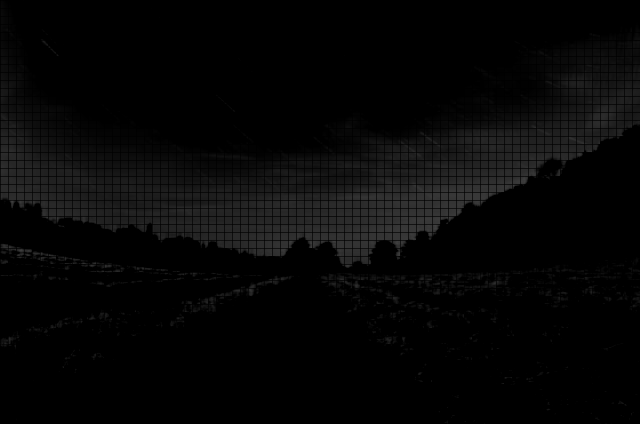

In [37]:
idct_img = Image.fromarray(res_IDCT)
print("Image after applying Inverse Discrete Cosine Transform\n")
if idct_img.mode != 'RGB': # If the image is not RGB, then the image is converted into RGB and displayed
    idct_img = idct_img.convert('RGB')
idct_img

In [38]:
idct_img.size

(640, 424)

Text(0.5, 1.0, 'After applying Inverse Discrete Cosine Transform')

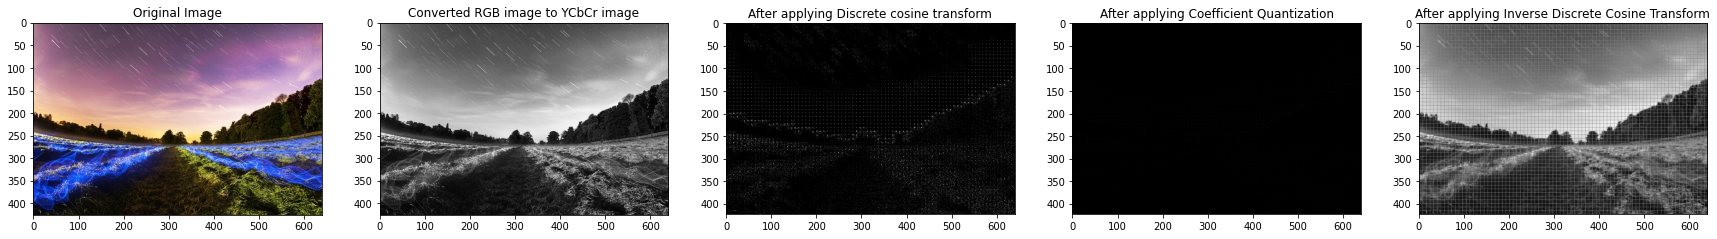

In [39]:
fig, ax = plt.subplots(ncols = 5, figsize = (30, 30))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(y, cmap = 'gray')
ax[1].set_title("Converted RGB image to YCbCr image")
ax[2].imshow(dct_img, cmap = 'gray')
ax[2].set_title("After applying Discrete cosine transform")
ax[3].imshow(q_img, cmap = 'gray')
ax[3].set_title("After applying Coefficient Quantization")
ax[4].imshow(res_IDCT, cmap = 'gray')
ax[4].set_title("After applying Inverse Discrete Cosine Transform")

**Saving the image as bmp and png file**

In [40]:
idct_img.save("JPEG_compressed_bmp_image.bmp")
idct_img.save("JPEG_compressed_png_image.png")

**Quantitative analysis of Image using PSNR(Peak Signal to Noise Ratio)**

In [42]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('bmp_image.bmp')
compressed = cv2.imread('JPEG_compressed_bmp_image.bmp')
new_image = cv2.resize(compressed, (640, 426))
value = PSNR(original, new_image)
print(f"PSNR value is {value}")

PSNR value is 28.03813469486296


**Higher the PSNR value is, the more compression is done.**